# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as smf

In [2]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 
                             'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

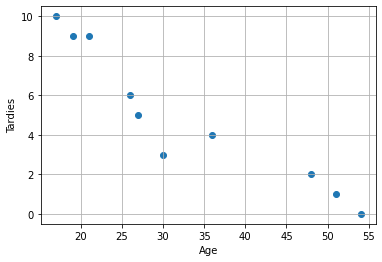

In [3]:
plt.scatter(student_data["X"],student_data["Y"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.grid(True);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# There seems to be an anticorrelation between the age and the number of tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Whith numpu.cov we van solve this exercise easily
# The main diagonal stands for the variance of X and Y
# The other values are the covariance

covar = np.cov(student_data["X"],student_data["Y"])[0][1]
corr = covar / np.sqrt(np.cov(student_data["X"],student_data["Y"])[0][0] *
                      np.cov(student_data["X"],student_data["Y"])[1][1])

print(f"Covariance = {round(covar,2)},  Correlation = {round(corr,2)}")

# The covariance is negative indicating anticorrelation. It represents the joint
# variation with respect to its means of the age and the number of tardies.
#
# The correlation is very close to -1, indicating a high anticorrelation between the age
# and the number of tardies.

Covariance = -45.57,  Correlation = -0.94


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# I am using the scikit-learn model LinearRegression as I want to obtain
# the linear regression between the age and the number of tardies.
lr = LinearRegression(fit_intercept=True)
lr.fit(student_data["X"].to_frame(),student_data["Y"])

LinearRegression()

Plot your regression model on your scatter plot.

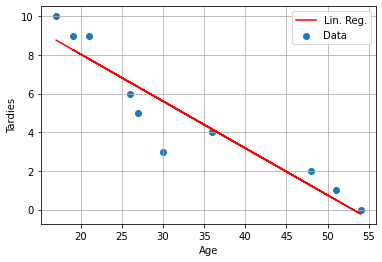

In [7]:
x=np.array(student_data["X"])
y=np.array(student_data["Y"])
xr=x.reshape(-1, 1)
plt.scatter(x,y,label="Data")
plt.plot(x,lr.predict(x.reshape(-1, 1)),color="red",label="Lin. Reg.")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.grid(True);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# The representation of the linear regression goes between the data, providing a good 
# fit with relatively low errors in general.

# To support this here I calculate the R2 score and the mean squared error
# R2 of almos 90% indicates a very good fit
# The MSE is low. As it is squared, big deviations causes big errors, so this is 
# another check
print("R2 score = ",r2_score(y_pred=lr.predict(x.reshape(-1, 1)), y_true=y) )
print("MSE = ",mean_squared_error(y_pred=lr.predict(x.reshape(-1, 1)), y_true=y) )

R2 score =  0.8820265558250109
MSE =  1.3319201847356268


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
x = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles['CO2 Emission Grams/Mile']

# Correlation coefficients
pd.concat([x,y],axis=1).corr()

# The most important in deremining the CO2 emission will be the Fuel Barrels/Year (corr=0.986), followed by 
# Fuel Cost/Year(corr=0.931) and Combined MPG (corr=-0.926) .

# The least important one is going to be the Year, with a correlation of -0.222

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
#lm2 = LinearRegression(fit_intercept=True)
#lm2.fit(x,y)
x = smf.add_constant(x)
mod = smf.OLS(y,x)
multi_lm = mod.fit()

# I am using the statsmodels.regression.linear_model.OLS (ordinary least squares), because it is a method
# that can show the summary.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# The R**2 value show a value very close to 1, indicating a very good fit
# The summary t statistics show how significant is the variable in the model.
# The most important ones are Fuel Barrels/Year, Combined MPG and Fuel Cost/Year, in that order
# The Combined MPG is an anticorrelation.
multi_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                             17:48:21   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 
                  'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

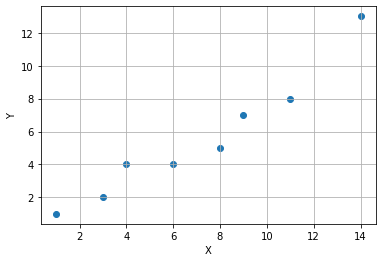

In [14]:
plt.scatter(df["X"],df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
# Apparently there seems to be a correlation between X and Y
x = df["X"]
y = df["Y"]
x = smf.add_constant(x)
lm2 = smf.OLS(y,x).fit(intercept=True)
lm2.summary()

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000102
Time:                        17:48:21   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

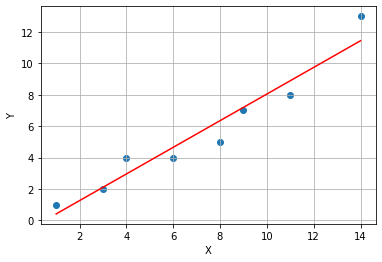

In [16]:
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],lm2.predict(x),color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True);

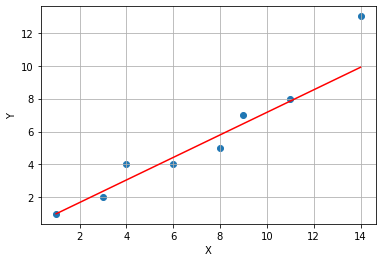

In [17]:
# I ignored the last datapoint as it seems to be an outlier.
x2 = df["X"][0:-1]
y2 = df["Y"][0:-1]
x2 = smf.add_constant(x2)
lm2_2 = smf.OLS(y2,x2).fit(intercept=True)

# The regression seems to follow better for the other datapoints
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],lm2_2.predict(x),color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True);

In [18]:
lm2_2.summary()

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000264
Time:                        17:48:22   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# The R2 value increased from 0.932 to 0.943, indicating a better fit of the rest of the datapoints